В первой ячейке импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')
df = df.sort_index()
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

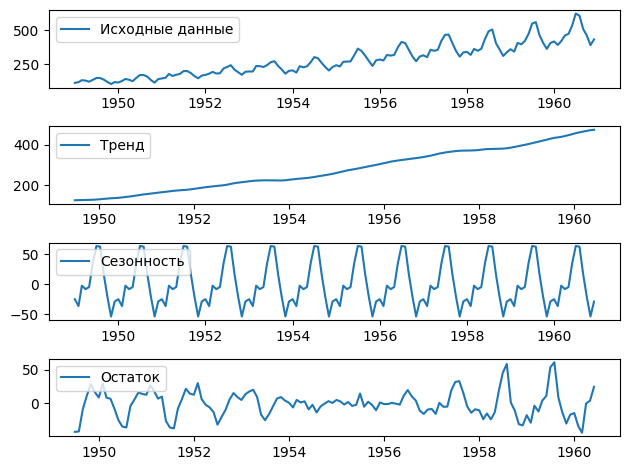

In [ ]:
plt.subplot(411)
plt.plot(df['#Passengers'], label='Исходные данные')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Тренд')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Сезонность')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Остаток')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
model = ARIMA(df['#Passengers'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
forecast = model_fit.forecast(24)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

In [ ]:
actual_values = df['#Passengers']['1960-01-01':].values
predicted_values = forecast.values
mse = mean_squared_error(actual_values, predicted_values[:12])
mae = mean_absolute_error(actual_values, predicted_values[:12])
print("MSE: ", mse)
print("MAE: ", mae)

MSE:  1360.6164157071273
MAE:  36.77240445145286


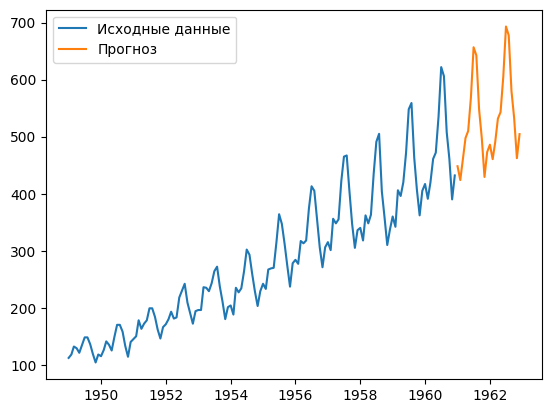

In [ ]:
plt.plot(df['#Passengers'], label='Исходные данные')
plt.plot(forecast, label='Прогноз')
plt.legend()
plt.show()